# Crime devolopment over the years

One of the main reasons to analyse this dataset would be to see if the amount of crime incidents are increasing or decreasing over the years. Here a visual plot will be created trying to visualize a posible trend.


## Methods

To be able to plot the data in a specific way, the data needs to be rearranged.

First the necessary python packages are imported to the script. These packages are needed to arrange the data and plot the data in an easy way.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

The package Pandas is used to import the csv-file and arrange the data in a matrix. The data under the column "date" is transformed to a datetime object for later use, and columns are renamed for easier access. In this case the column "Date" is the only one really needed, but "Year" are also used for easier separation of data. Every day of each year is organized together in a dataframe, and then the objects from the same day are grouped together. To get the y-value, the total incidents on inch day are counted.

In [6]:
data = pd.read_csv('crimes.csv', encoding='latin-1')
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])
rename = {'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year'}
data.rename(index=str, columns=rename, inplace=True)

data = data.assign(Date=data.Date.dt.round('3D'))
date_data = data[["Date","Year"]]
data2015 = date_data.loc[date_data['Year'].isin([2015])]
data2016 = date_data.loc[date_data['Year'].isin([2016])]
data2017 = date_data.loc[date_data['Year'].isin([2017])]
data2018 = date_data.loc[date_data['Year'].isin([2018])]
data2019 = date_data.loc[date_data['Year'].isin([2019])]

data2017 = data2017[data2017["Date"] != "2018-01-01 00:00:00"]
data2017 = data2017[data2017["Date"] != "2016-12-31 00:00:00"]
data2018 = data2018[data2018["Date"] != "2019-01-02 00:00:00"]

data2015 = data2015.groupby("Date")
data2016 = data2016.groupby("Date")
data2017 = data2017.groupby("Date")
data2018 = data2018.groupby("Date")
data2019 = data2019.groupby("Date")


x_2015 = list(data2015.groups.keys())
x_2017 = list(data2017.groups.keys())
x_2018 = list(data2018.groups.keys())
x_2019 = list(data2019.groups.keys())


x_data2015 = [i.replace(year=2016) for i in x_2015]
x_data2017 = [i.replace(year=2016) for i in x_2017]
x_data2018 = [i.replace(year=2016) for i in x_2018]
x_data2019 = [i.replace(year=2016) for i in x_2019]


## Results

In the result the data is presented visually in a lineplot by using the python package "matlibplot". The x-values represents every 3rd day in a year, and the y-values represents the total amount of crime incidents in this three days. It is used different colour codes for each year, and every year is plotted in one plot.

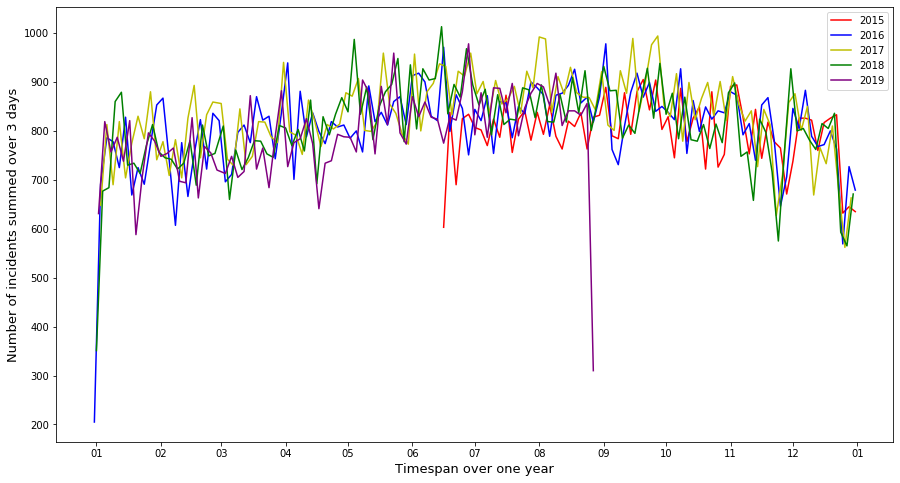

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x_data2015, data2015.count(), color="r", label="2015")
ax.plot(list(data2016.groups.keys()), data2016.count(), color="b", label="2016")
ax.plot(x_data2017, data2017.count(), color="y", label="2017")
ax.plot(x_data2018, data2018.count(), color="g", label="2018")
ax.plot(x_data2019, data2019.count(), color="Purple", label="2019")

plt.xlabel("Timespan over one year", fontsize=13)
plt.ylabel("Number of incidents summed over 3 days", fontsize= 13)

months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%m')
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_major_locator(months)

ax.legend()
plt.show()

A numerical result is also given. Here the mean value over three days in a year is given.

In [12]:
print(data2015.count().mean())
print(data2016.count().mean())
print(data2017.count().mean())
print(data2018.count().mean())
print(data2019.count().mean())

Year    799.835821
dtype: float64
Year    808.252033
dtype: float64
Year    832.867769
dtype: float64
Year    808.508197
dtype: float64
Year    791.55
dtype: float64


## Discussion

The date in the data is reformatted so all the incidents in a span over 3 days are grouped together. If this had not been done it would have been a lot of spikes in the y-values and even harder to see a trend. A negative consequence of this is in some cases the first or last days in the year are grouped in wrong year. A result of this can be seen for year 2016 and 2018 at the start of the plot were the y-value is way too low. The dates organized in a wrong year is removed, a fast solution, but maybe not the best. Because we are looking for a trend over 365 days, remove one or two days is not that big of a problem for the result. 

The spikes down at the start of 2015 and at the end of 2019 plot are a result of a not complete year. Since the data is from mid-2015 to mid-2019, and most likely the start and end y-value is not based on three full days.

Visually a trend can't really be seen in the plot. The difference in the years are not on more than 200 incidents per point, and this is not a continuing difference over the year. Also, the mean value over the year seems to be quiet stable, and with that we can’t see a rise or fall in the amount of crime incidents.  
 
